In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import get_dummies
from pandas import concat
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn import ensemble
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.feature_selection import f_classif, f_regression, SelectKBest
from sklearn.pipeline import Pipeline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('BlackFriday.csv')
df = df[['Product_ID','Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Product_Category_1', 'Product_Category_2',
         'Product_Category_3','Marital_Status', 'Purchase']]


In [3]:
df.count()

Product_ID                    537577
Gender                        537577
Age                           537577
Occupation                    537577
City_Category                 537577
Stay_In_Current_City_Years    537577
Product_Category_1            537577
Product_Category_2            370591
Product_Category_3            164278
Marital_Status                537577
Purchase                      537577
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 11 columns):
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Marital_Status                537577 non-null int64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 34.9+ MB


Cleaning up the data

In [5]:
columns = list(df.columns)
for column in columns:
    df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '')

In [6]:
df.Stay_In_Current_City_Years.unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [7]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [8]:
df.Purchase.unique()

array([ 8370, 15200,  1422, ..., 14539, 11120, 18426], dtype=int64)

In [9]:
df.Purchase.max()

23961

In [10]:
df.Purchase.min()

185

In [11]:
df.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [12]:
#Recoding the catergorical values using replace
Age_cleanup = {'Age':   {'0-17': 0, '18-25': 1,'26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5,'55+':6}}
df.replace(Age_cleanup, inplace=True)
df.head(20)

City_cleanup ={'City_Category':   {'A': 0, 'B': 1,'C': 2}}
df.replace(City_cleanup, inplace=True)

Gender_cleanup = {'Gender': {'M': 1, 'F': 0}}
df.replace(Gender_cleanup, inplace=True)

#df['Purchase'] = df['Purchase'].apply(lambda x: 0 if x <= 5000 else 1 if x <= 10000 else 2 if x<= 15000 else 3 if x<=20000 else 4 )

In [13]:
df.Gender.unique()

array([0, 1], dtype=int64)

In [14]:
df.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [15]:
df = df.fillna(0)

In [16]:
#df.apply(pd.to_numeric)

In [17]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3,Marital_Status,Purchase
0,P00069042,0,0,10,0,2,3,0.0,0.0,0,8370
1,P00248942,0,0,10,0,2,1,6.0,14.0,0,15200
2,P00087842,0,0,10,0,2,12,0.0,0.0,0,1422
3,P00085442,0,0,10,0,2,12,14.0,0.0,0,1057
4,P00285442,1,6,16,2,4,8,0.0,0.0,0,7969


### EDA

In [18]:
df.describe()

,Gender,Age,Occupation,City_Category,Product_Category_1,Product_Category_2,Product_Category_3,Marital_Status,Purchase
count,537577.000000,537577.000000,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,0.754087,2.494755,8.08271,1.040567,5.295546,6.784907,3.871773,0.408797,9333.859853
std,0.430627,1.352583,6.52412,0.759627,3.750701,6.211618,6.265963,0.491612,4981.022133
min,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,185.000000
25%,1.000000,2.000000,2.00000,0.000000,1.000000,0.000000,0.000000,0.000000,5866.000000
50%,1.000000,2.000000,7.00000,1.000000,5.000000,5.000000,0.000000,0.000000,8062.000000
75%,1.000000,3.000000,14.00000,2.000000,8.000000,14.000000,8.000000,1.000000,12073.000000
max,1.000000,6.000000,20.00000,2.000000,18.000000,18.000000,18.000000,1.000000,23961.000000


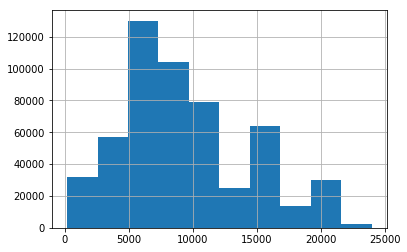

In [19]:
df.Purchase.hist()

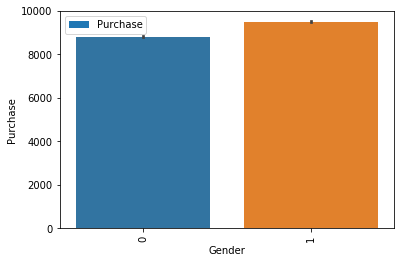

In [20]:
df[['Gender','Purchase']].groupby('Gender').mean().plot.bar()
sns.barplot('Gender', 'Purchase', data = df)
plt.show()

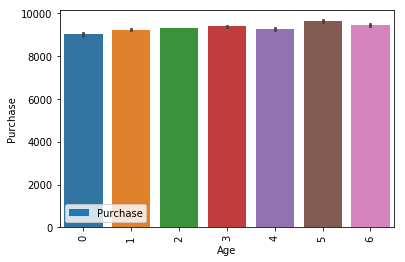

In [21]:
df[['Age','Purchase']].groupby('Age').mean().plot.bar()
sns.barplot('Age', 'Purchase', data = df)
plt.show()

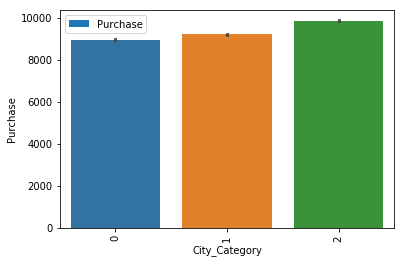

In [22]:
df[['City_Category','Purchase']].groupby('City_Category').mean().plot.bar()
sns.barplot('City_Category', 'Purchase', data =df)
plt.show()

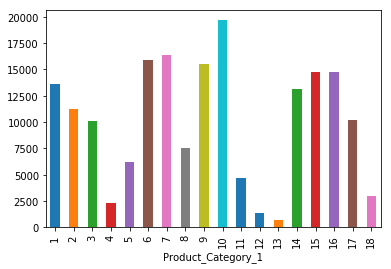

In [23]:
df.groupby('Product_Category_1').Purchase.mean().plot(kind = 'bar')
plt.show()

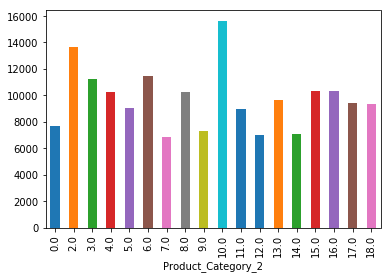

In [24]:
df.groupby('Product_Category_2').Purchase.mean().plot(kind = 'bar')
plt.show()

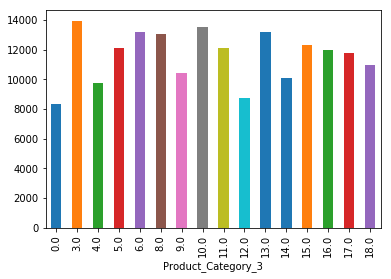

In [25]:
df.groupby('Product_Category_3').Purchase.mean().plot(kind = 'bar')
plt.show()

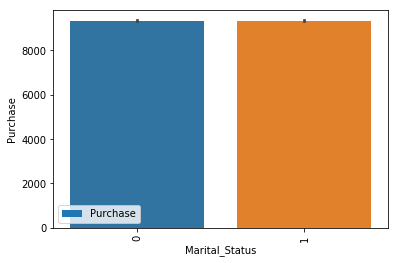

In [26]:
df[['Marital_Status','Purchase']].groupby('Marital_Status').mean().plot.bar()
sns.barplot('Marital_Status', 'Purchase', data = df)
plt.show()

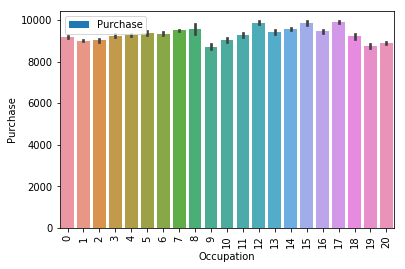

In [27]:
df[['Occupation','Purchase']].groupby('Occupation').mean().plot.bar()
sns.barplot('Occupation', 'Purchase', data = df)
plt.show()

In [28]:
#temp = pd.get_dummies(df.Product_Category_1, prefix='dummies')
#df2 = pd.concat([df, temp], axis =1)

In [29]:
#df2.columns

In [30]:
features = df[['Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Product_Category_1', 
               'Product_Category_2', 'Product_Category_3','Marital_Status']]
X = features
y = df.Purchase

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [32]:
#temp = X_train
#temp['Purchase'] = y_train
#temp1 = temp.groupby(['Product_Category_1']).Purchase.mean().reset_index()

In [33]:
#temp1.columns = ['Product_Category_1', 'Avg_Purchase_Per_Product_Category']

In [34]:
#temp = pd.merge(temp,temp1,on = 'Product_Category_1')

In [35]:
#temp.head()

In [36]:
#X_train = temp.drop('Purchase', 1)
#y_train =temp.Purchase


In [37]:
#X_test= pd.merge(X_test, temp1, on = 'Product_Category_1')

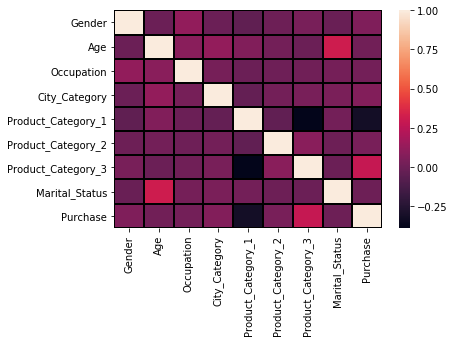

In [38]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, linecolor='k', linewidths=1)

In [39]:
#random forest
rf = ensemble.RandomForestRegressor()
rf.fit(X_train,y_train)
cross_val_score(rf, X_train, y_train, cv=5)

array([0.60451085, 0.60765665, 0.60480447, 0.60823324, 0.60718189])

In [40]:
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.7818421433878874
0.6087936534122169


In [41]:
#lasso regression, alpha = 5
lr = linear_model.Lasso(alpha=5, fit_intercept=False) 
lr.fit(X_train, y_train)
scores_lr = cross_val_score(lr, X_train, y_train, cv=5)
score_lr = cross_val_score(lr, X_train, y_train, cv=5).mean()
print('Lambda:', 5)
print('Coefficients: \n', lr.coef_)
print('Cross-Validation Scores: \n', scores_lr)
print('Averaged Cross-Validation Scores: {:.2%}.\n'.format(score_lr))

Lambda: 5
Coefficients: 
 [2777.87897421  724.87490801   79.92831405 1192.74427724  641.07350379
  -14.94304215  103.93977179  259.29106882  319.246449  ]
Cross-Validation Scores: 
 [-0.08807156 -0.08922988 -0.0830275  -0.08703242 -0.0884676 ]
Averaged Cross-Validation Scores: -8.72%.



In [42]:
#lasso regression, alpha = 10
lr = linear_model.Lasso(alpha=10, fit_intercept=False) 
lr.fit(X_train, y_train)
scores_lr = cross_val_score(lr, X_train, y_train, cv=5)
score_lr = cross_val_score(lr, X_train, y_train, cv=5).mean()
print('Lambda:', 10)
print('Coefficients: \n', lr.coef_)
print('Cross-Validation Scores: \n', scores_lr)
print('Averaged Cross-Validation Scores: {:.2%}.\n'.format(score_lr))

Lambda: 10
Coefficients: 
 [2760.71577393  727.53824316   80.42778115 1188.35761729  640.90498423
  -13.38559591  104.24500635  259.80292098  300.32313736]
Cross-Validation Scores: 
 [-0.08809132 -0.08926628 -0.08302014 -0.0870304  -0.08853592]
Averaged Cross-Validation Scores: -8.72%.



In [43]:
#boosting
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
scores_gb = cross_val_score(gb, X_train,y_train, cv=5)
score_gb = cross_val_score(gb, X_train, y_train, cv=5).mean() 

print('Cross-Validation Scores: \n', scores_gb)
print('Averaged Cross-Validation Scores: {:.2%}.\n'.format(score_gb))
gb.score(X_test, y_test)


Cross-Validation Scores: 
 [0.63976619 0.64168186 0.64190724 0.63882436 0.64045581]
Averaged Cross-Validation Scores: 64.05%.



0.6362199380215824

In [51]:
importances = {}

for feature, importance in zip(X.columns, rf.feature_importances_):
    importances[feature] = importance

importances_desc = sorted(importances.items(), key=lambda x: x[1], reverse=True)
importances_desc = pd.DataFrame(importances_desc, columns=['feature','importance'])

In [52]:
importances_desc.head(10)

,feature,importance
0,Product_Category_1,0.756493
1,Occupation,0.065148
2,Stay_In_Current_City_Years,0.045928
3,Age,0.040473
4,Product_Category_2,0.026997
5,Product_Category_3,0.017392
6,Marital_Status,0.017091
7,City_Category,0.016387
8,Gender,0.014092


In [62]:
scaler = StandardScaler()
selector1 = SelectKBest(f_classif, k='all')
rfc2 = ensemble.RandomForestClassifier()